In [1]:
using Pkg
Pkg.add("FFTW")
Pkg.add("Plots")
using FFTW
using Plots

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [2]:
Fs = 1024;  

t = 0:1/(Fs-1):1; 

x1 = sin.(2*pi*t*200) + 2* sin.(2*pi*t*400)

1024-element Array{Float64,1}:
  0.0                  
  2.207021244212628    
 -1.3271388898696335   
  1.2533964120246632   
 -1.762901709938093    
 -0.6983641556218964   
  2.532063773598228    
 -1.258094993652871    
  1.0495632085008157   
 -1.2371701815227443   
 -1.3497121474756428   
  2.70889209238244     
 -1.045639160072822    
  ⋮                    
 -2.708892092382448    
  1.3497121474756923   
  1.2371701815226994   
 -1.0495632085007944   
  1.2580949936528594   
 -2.5320637735982467   
  0.698364155621943    
  1.7629017099380595   
 -1.253396412024654    
  1.3271388898696337   
 -2.207021244212651    
  3.928773447456944e-14

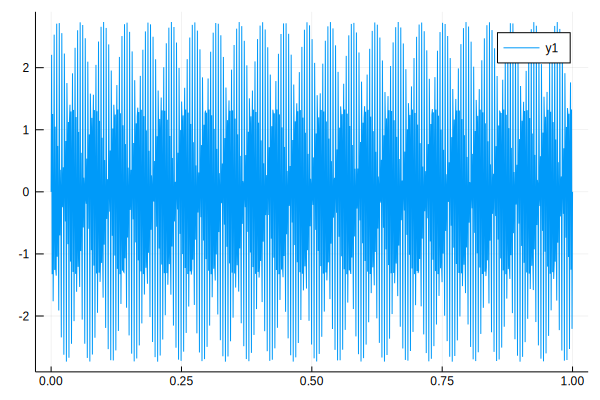

In [3]:
plot(t, x1)

In [4]:
y1=fft(x1)

1024-element Array{Complex{Float64},1}:
  6.004086117172847e-13 + 0.0im                  
  2.0058088698426957e-5 - 0.0065378998719904935im
   8.023699271886287e-5 - 0.01307643267462788im  
 0.00018055063302213625 - 0.01961623163003029im  
 0.00032102221852214896 - 0.02615793054702714im  
  0.0005016842652896258 - 0.03270216411448912im  
  0.0007225786186597638 - 0.039249568194158035im 
  0.0009837564783703456 - 0.045800780116847406im 
   0.001285278435911863 - 0.05235643898238429im  
  0.0016272145163824803 - 0.05891718595777373im  
   0.002009644225263507 - 0.06548366457428978im  
  0.0024326566026351415 - 0.07205652103574955im  
  0.0028963502837702215 - 0.07863640452469944im  
                        ⋮                        
  0.0028963502837702215 + 0.07863640452469656im  
  0.0024326566026340313 + 0.07205652103575044im  
   0.002009644225266616 + 0.06548366457428845im  
  0.0016272145163833684 + 0.058917185957772844im 
  0.0012852784358940994 + 0.05235643898237896im  
  0.000983

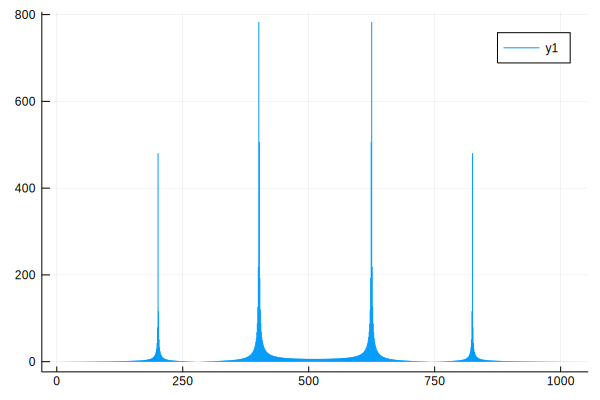

In [5]:
sticks((abs.(fft(x1))))

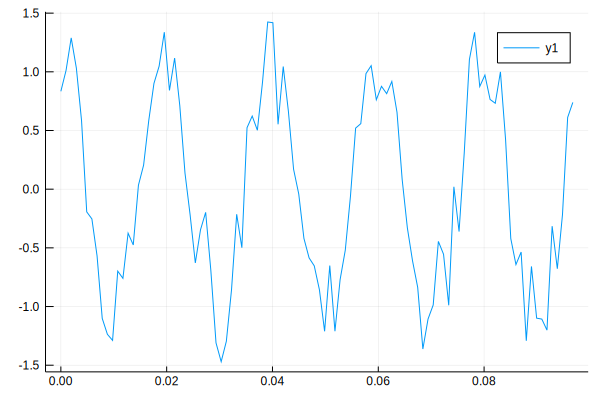

In [6]:
x2=cos.(2*pi*t*50)

for i in 1:size(x2, 1)
    x2[i] = x2[i] - 0.5 + rand()
end

plot(t[1:100], x2[1:100])

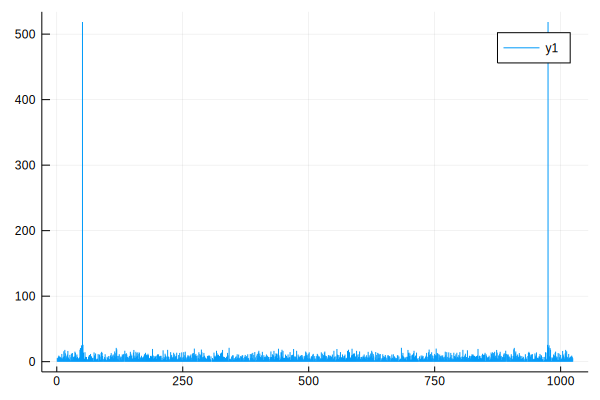

In [7]:
y2=fft(x2)
sticks((abs.(y2)))

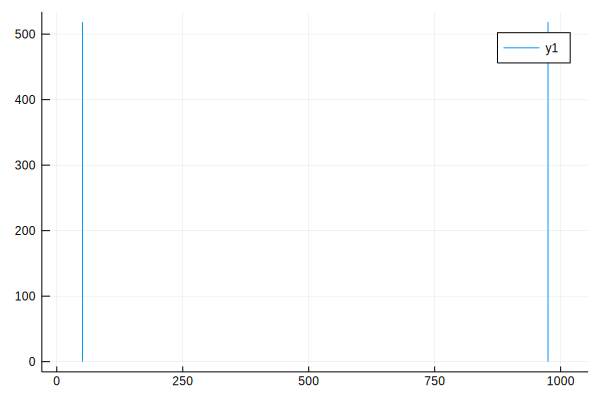

In [8]:
y3 = abs.(fft(x2))

for i in 1:1024
    if y3[i] <= 150
        y3[i] = 0.0
    end
end

sticks(y3)

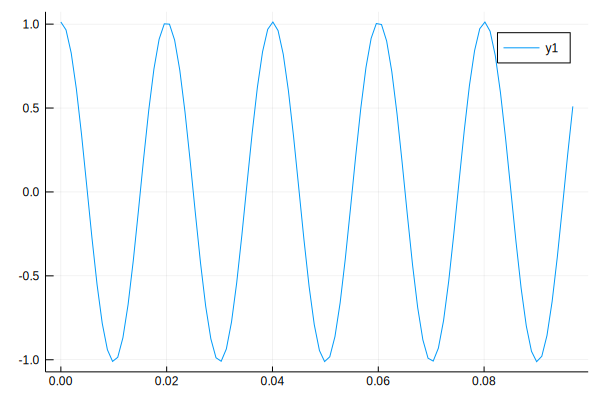

In [9]:
x3 = ifft(y3)

plot(t[1:100], real.(x3)[1:100])

In [10]:
Pkg.add("WAV")

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [11]:
using WAV
using Plots

In [12]:
function display_fft(fft_y)    
    display(sticks(abs.(fft_y[1:20:length(fft_y)])))
end

display_fft (generic function with 1 method)

In [13]:
function alter_audio(audio, offset)
    audio_fft = fft(audio)
    new_audio_fft = zeros(ComplexF64, length(audio_fft))
    
    for i=1:15000
        new_audio_fft[i + offset] = audio_fft[i]
        new_audio_fft[length(audio_fft) - offset - 15000 + i] = audio_fft[length(audio_fft) - 15000 + i]
    end
    
    display_fft(new_audio_fft)
    
    audio_altered = ifft(new_audio_fft)
    
    audio_altered_real = real.(audio_altered)
    
    return audio_altered_real
end

alter_audio (generic function with 1 method)

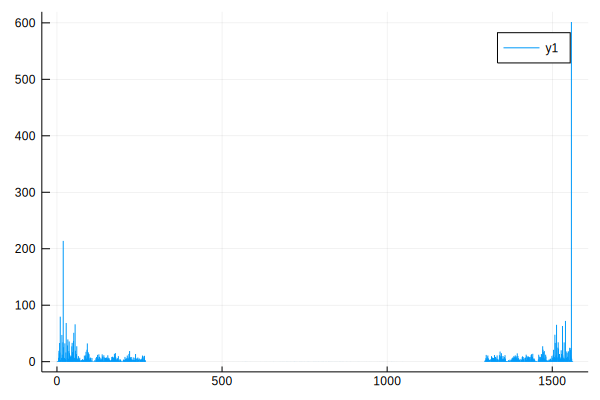

In [16]:
snd, sampFreq = wavread("audio.wav")

wavplay(snd, sampFreq)

display_fft(fft(snd))

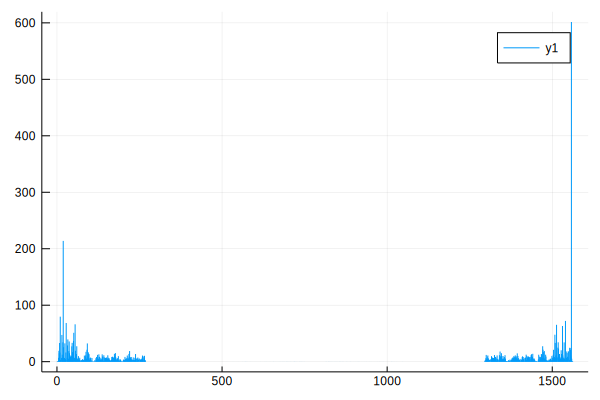

In [193]:
wavplay(alter_audio(snd, 0), sampFreq)

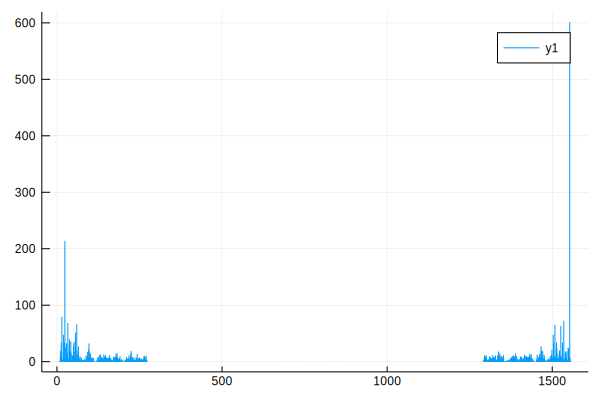

In [17]:
wavplay(alter_audio(snd, 100), sampFreq)

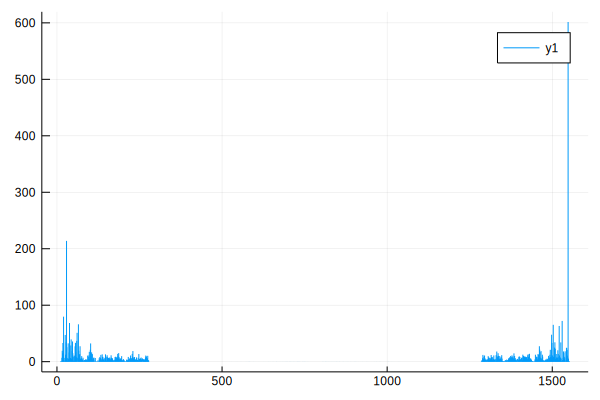

In [18]:
wavplay(alter_audio(snd, 200), sampFreq)

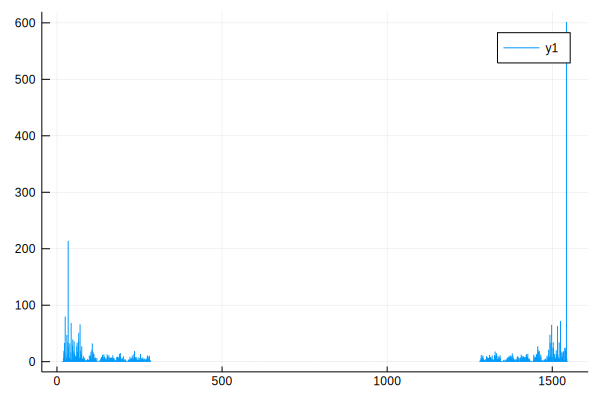

In [19]:
wavplay(alter_audio(snd, 300), sampFreq)

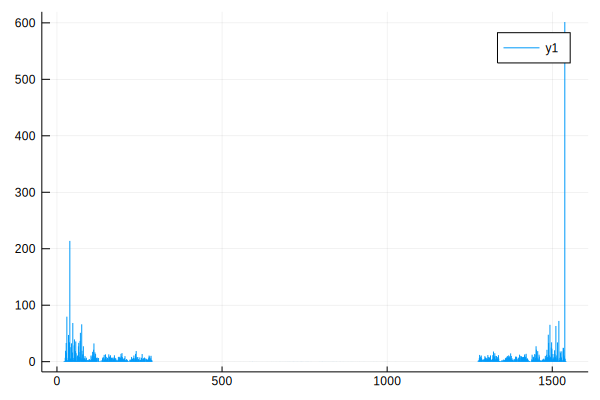

In [20]:
wavplay(alter_audio(snd, 400), sampFreq)

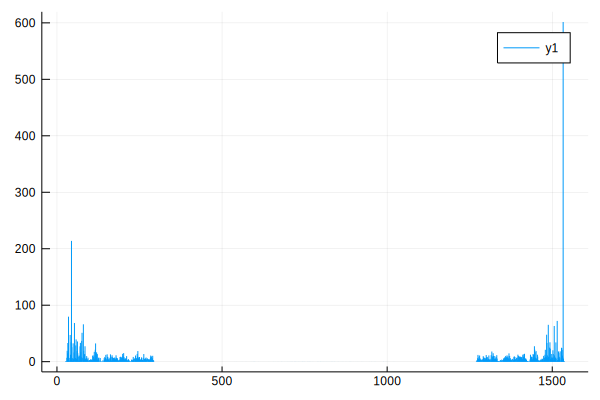

In [21]:
wavplay(alter_audio(snd, 500), sampFreq)

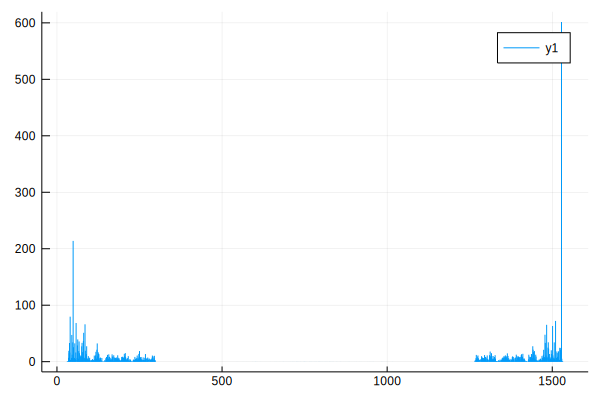

In [22]:
wavplay(alter_audio(snd, 600), sampFreq)

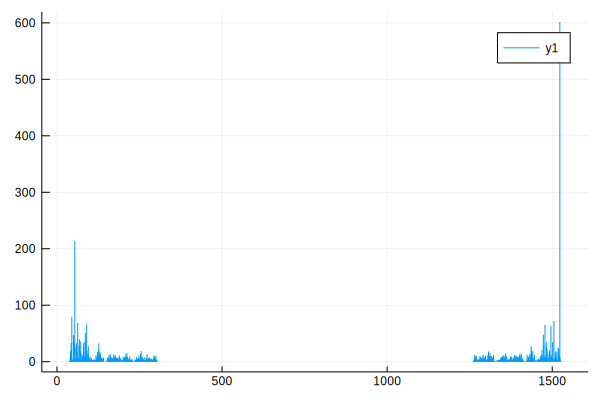

In [23]:
wavplay(alter_audio(snd, 700), sampFreq)

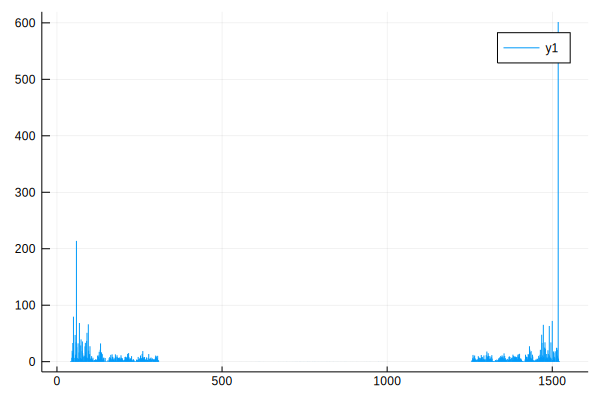

In [24]:
wavplay(alter_audio(snd, 800), sampFreq)

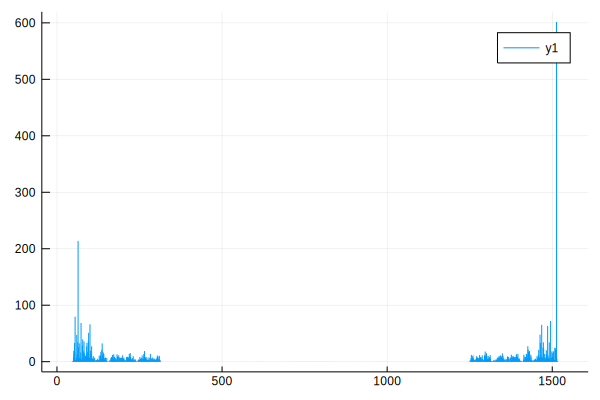

In [188]:
wavplay(alter_audio(snd, 900), sampFreq)

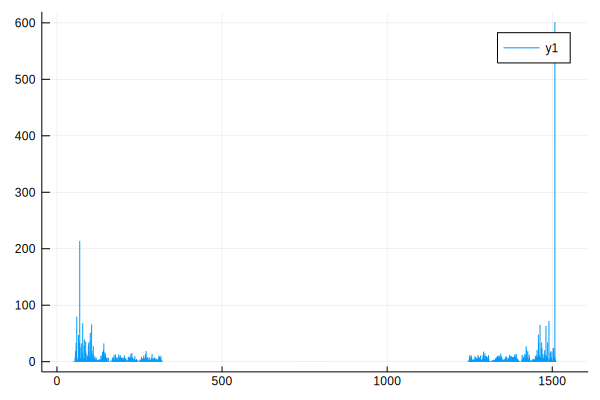

In [189]:
wavplay(alter_audio(snd, 1000), sampFreq)